<a href="https://colab.research.google.com/github/pranavdighade123/Data-Preprocessing-Practicals-/blob/main/DP_Practical06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Perform proper data labelling operation on dataset.


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequality-red.csv to winequality-red.csv


The data corresponds to wines with quality scores between 0 and 10.Let’s consider the problem of classifying whether or not a wine is above 10% alcohol. Let’s take a look at the minimum and maximum values for alcohol 

In [ ]:
import pandas as pd
df_wine = pd.read_csv("winequality-red.csv")
print(df_wine.head())
print("Quality values: ", set(df_wine['quality']))
print("Max Alcohol %: ", df_wine['alcohol'].max())
print("Min Alcohol %: ", df_wine['alcohol'].min())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

plot the distribution:

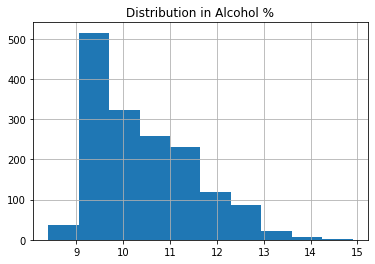

In [ ]:
import matplotlib.pyplot as plt
plt.title("Distribution in Alcohol %")
df_wine['alcohol'].hist()
plt.show()

We will label the data with a ‘1’ if the alcohol % is above or equal to 10% and ‘0’ otherwise and  visualize the distribution in binary labels

<BarContainer object of 2 artists>

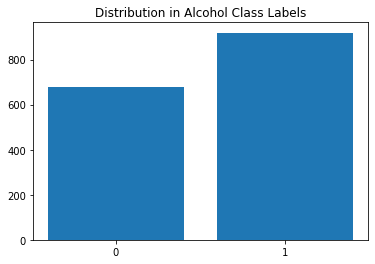

In [ ]:
import numpy as np
df_wine['alcohol_class'] = np.where(df_wine['alcohol']>=10.0, '1', '0')
from collections import Counter
plt.title("Distribution in Alcohol Class Labels")
plt.bar(dict(Counter(df_wine['alcohol_class'])).keys(), dict(Counter(df_wine['alcohol_class'])).values())

We can use the Pandas ‘.loc[]’ method to assign ternary labels to the data, which would segment the data into three groups. The label of ‘0’ will be assigned to values (4–7), ‘1’ will be assigned to values (7–9), and ‘2’ will be assigned to values (9–16)

In [ ]:
print("Max fixed acidity %: ", df_wine['fixed acidity'].max())
print("Min fixed acidity %: ", df_wine['fixed acidity'].min())
df_wine.loc[(df_wine['fixed acidity']>4.0) & (df_wine['fixed acidity']<=7.0), 'acidity_class'] = 0
df_wine.loc[(df_wine['fixed acidity']>7.0) & (df_wine['fixed acidity']<=9.0), 'acidity_class'] = 1
df_wine.loc[(df_wine['fixed acidity']>9.0) & (df_wine['fixed acidity']<=16.0), 'acidity_class'] = 2

Max fixed acidity %:  15.9
Min fixed acidity %:  4.6


<BarContainer object of 3 artists>

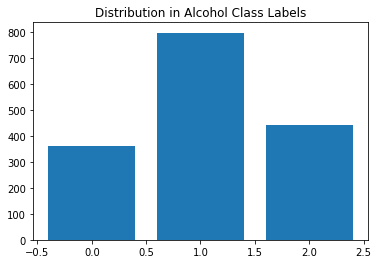

In [ ]:
plt.title("Distribution in Alcohol Class Labels")
plt.bar(dict(Counter(df_wine['acidity_class'])).keys(), dict(Counter(df_wine['acidity_class'])).values())